## Övning 3.6

Uppgiften lyder
<img src="img/exe3.61.png">
<img src="img/exe3.62.png">

In [25]:
import pandas as pd
import numpy as np

stickprov = [[0.48,0.36,0.20,0.55,0.45,0.46,0.47,0.23],\
             [0.35,0.37,0.27,0.29,None,None,None,None]]
data = pd.DataFrame(np.transpose(stickprov),columns=["Male","Female"])
data

,Male,Female
0,0.48,0.35
1,0.36,0.37
2,0.2,0.27
3,0.55,0.29
4,0.45,None
5,0.46,None
6,0.47,None
7,0.23,None


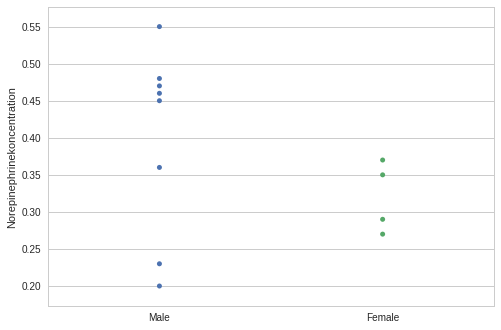

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
sns.stripplot(data=data)
plt.ylabel("Norepinephrinekoncentration")

In [4]:
antal = data.count()
medel = data.mean()
medel

Male      0.40
Female    0.32
dtype: float64

In [5]:
var = data.var()
stdv = data.std()
stdv

Male      0.125584
Female    0.047610
dtype: float64

A. Vi börjar med att göra ett F-test för att se om serierna har signifikant olika varians. Se (3.6.1)

In [6]:
F=var["Male"]/var["Female"]
F

6.9579831932773146

Kritiskt värde kan utläsas ur tabel A.4 eller ur följande formel.

In [11]:
from scipy.stats import f
f.ppf(1-0.05/2,antal["Male"]-1,antal["Female"]-1)

14.624395022241256

Eftersom vårt värde $F$ är mindre än det kritiska värdet så kan vi anta att serierna har samma varians och standard avvikelse. Vi skulle även kunnat komma till samma slutsats genom att räkna ut $F$-testets $p$-värde

In [12]:
p=2*f.sf(F,antal["Male"]-1,antal["Female"]-1)
p

0.13903756348405871

Vi vet nu att vi kan nu göra ett t-test för gemensam varians. Vi börjar med att poola variansen enligt (3.3.1)

In [18]:
pool_var = ((antal["Male"]-1)*var["Male"]+(antal["Female"]-1)*var["Female"])/ \
           (antal["Male"]+antal["Female"]-2)
pool_stdv = np.sqrt(pool_var)
pool_stdv

0.10825894882179486

Vi kan nu räkna ut en $t$-värde m.h.a. (3.3.2)

In [22]:
tv = (medel["Male"]-medel["Female"])/ \
     (pool_stdv*np.sqrt(1.0/antal["Male"]+1.0/antal["Female"]))
tv

1.2067312159430055

Detta kan jämföras med ett kritiskt $t$ på en tvåsidig 5%-nivå (= ensidig 2.5%-nivå) med 10 frihetsgrader, $t^{0.975}_{10}$. Samma värde kan även hittas i tabell A.2.

In [23]:
from scipy.stats import t
t.ppf(1-0.05/2,antal["Male"]+antal["Female"]-2)

2.2281388519649385

Genomsnitten skiljer sig inte signifikant åt, eftersom abs(tv) < $t^{0.975}_{10}$.

Vi kan även räkna ut ett $p$-värde. Observera multiplikation med 2 för att få ett två-sidigt $p$-värde.

In [24]:
p=2*t.sf(abs(tv),antal["Male"]+antal["Female"]-2)
p

0.25530650810155286